# Пример на примере молока с разной концентрацией лактозы 

Источник: https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
import seaborn as sns

[['1/02/2018' 1 2.39752603 ... 0.132313162 0.137996882 0.1441513]
 ['1/02/2018.1' 1 2.39952564 ... 0.131837472 0.137190655 0.143028095]
 ['1/02/2018.2' 1 2.3964746 ... 0.132499516 0.138216838 0.144523725]
 ...
 ['1/02/2018.47' 9 2.3326304 ... 0.142814323 0.148049682 0.153914914]
 ['1/02/2018.48' 9 2.33211207 ... 0.143144116 0.148405477 0.154304668]
 ['1/02/2018.49' 9 2.33669448 ... 0.144036546 0.149729922 0.155718535]]


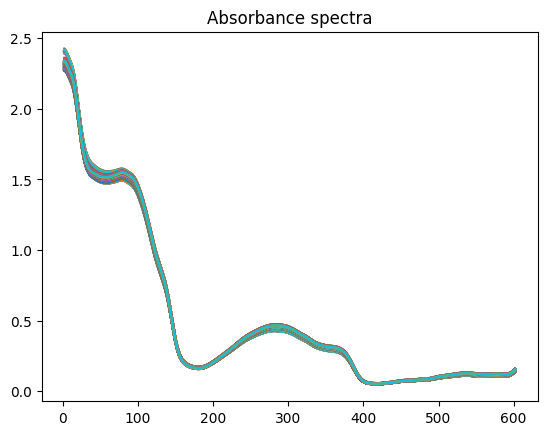

In [2]:
data = pd.read_csv('./data/milk.csv') # Import data from csv


na = data.to_numpy()
print(na)
x = list(data)
x = list(map(int, x[2:]))
for i in range(data.shape[0]):
    plt.plot(x, na[i,2:])
plt.title('Absorbance spectra')
plt.show()

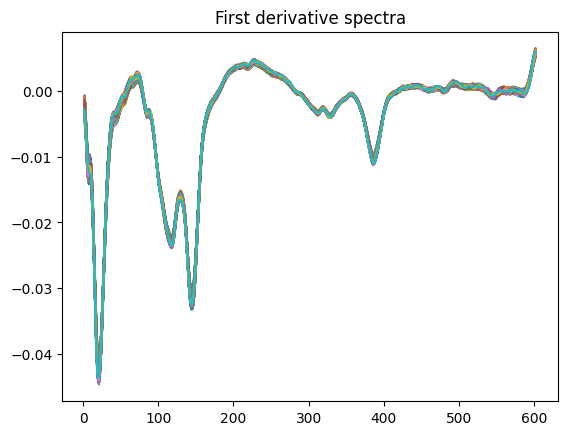

In [3]:
for i in range(data.shape[0]):
    plt.plot(x, np.gradient(na[i,2:]))
plt.title('First derivative spectra')
plt.show()

In [4]:
# The first column of the Data Frame contains the labels
lab = data.values[:,1].astype('uint8') 
 
# Read the features (scans) and transform data from reflectance to absorbance
feat = np.log(1.0/(data.values[:,2:]).astype('float32'))
 
# Calculate first derivative applying a Savitzky-Golay filter
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

# Initialise
skpca1 = sk_pca(n_components=10)
skpca2 = sk_pca(n_components=10)
 
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)
 
# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = skpca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_

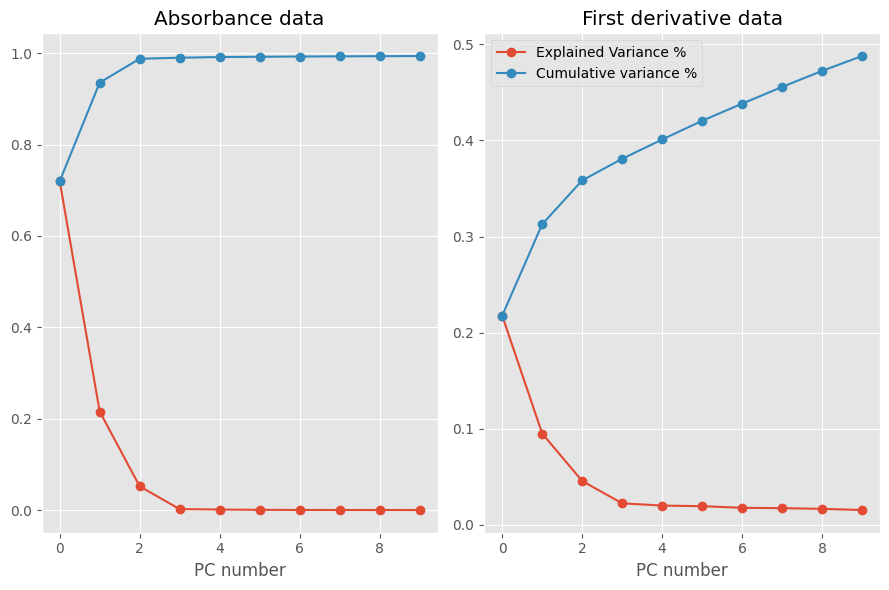

In [5]:
# Plot data
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

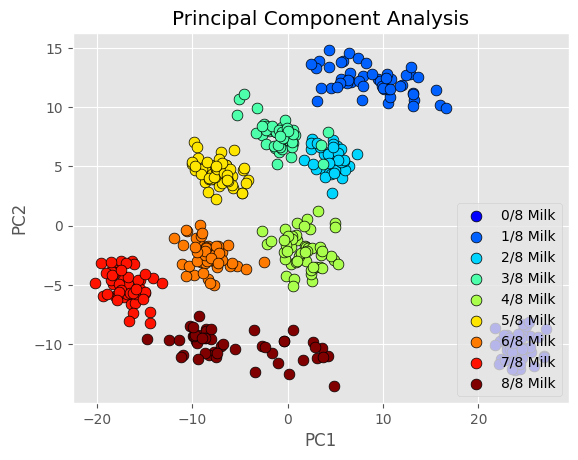

In [6]:
# Running the Classification of NIR spectra using Principal Component Analysis

skpca2 = sk_pca(n_components=4)
 
# Transform on the scaled features
Xt2 = skpca2.fit_transform(nfeat2)

# Define the labels for the plot legend
labplot = ["0/8 Milk","1/8 Milk","2/8 Milk", "3/8 Milk", \
"4/8 Milk", "5/8 Milk","6/8 Milk","7/8 Milk", "8/8 Milk"]
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='lower right')
    plt.title('Principal Component Analysis')
    plt.show()

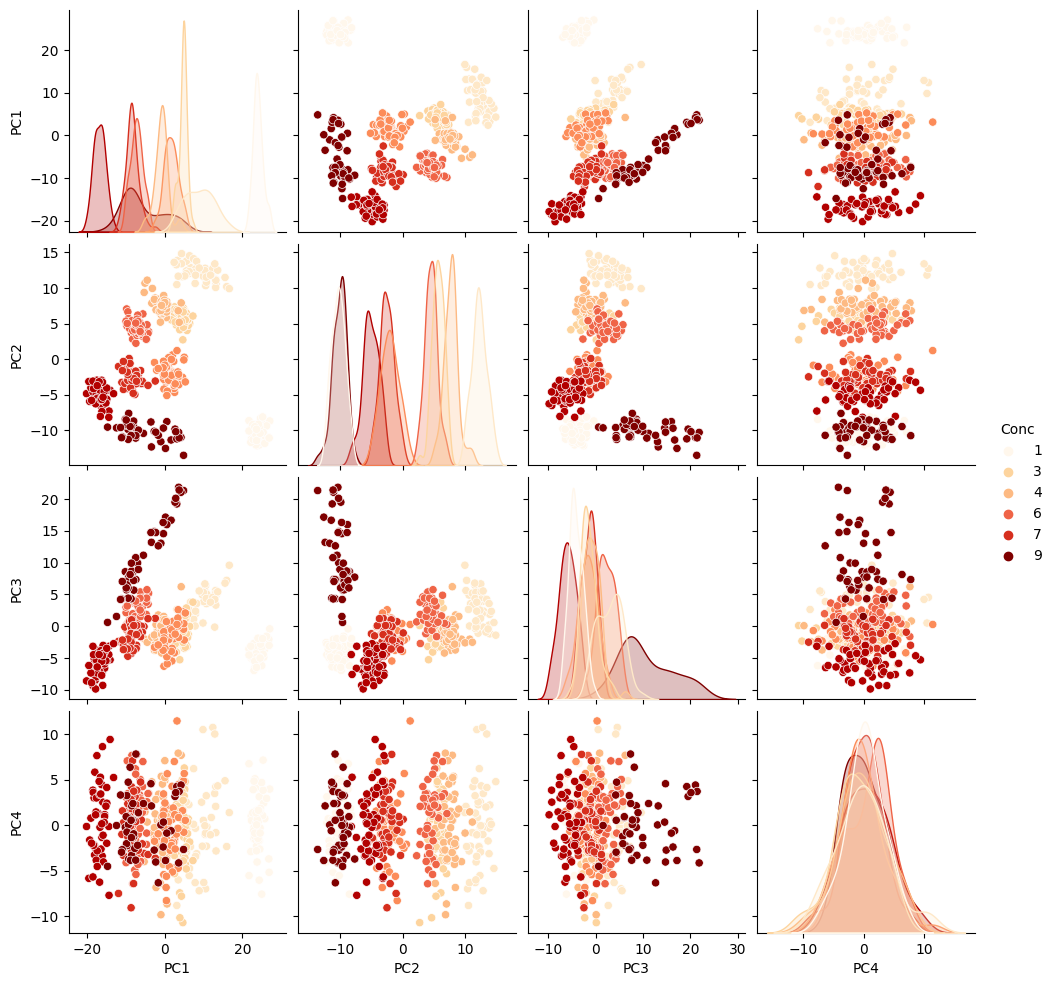

In [8]:
# layered kernel density estimate (KDE) 
df["Conc"] = lab.T.astype("int")
sns.pairplot(df, hue="Conc", palette='OrRd')
plt.show()